#T1. Finding Key Connectors
*   Create a **dict** where the keys are user ```id```s and the values are lists of friend ```id```s.

* HW02 수행을 위한 dataset을 사용하려면 아래 있는 **is_hw_data_set**을 선택하세요.(Check **is_hw_data_set** check box below to use data sets for the HW 02.)

In [ ]:
is_hw_data_set = True #@param {type:"boolean"}
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

if is_hw_data_set :
  friendship_pairs = [(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (1, 9),
                    (2, 3), (2, 7), (3, 4), (3, 5), (4, 6), (5, 6), 
                    (5, 7), (6,7), (6, 8), (6, 9), (7, 8), (8, 9)]
else :
  friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), 
                    (2, 3), (3, 4), (4, 5), (5, 6), 
                    (5, 7), (6, 8), (7, 8), (8, 9)]

# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j

print(friendships[7])

[2, 5, 6, 8]


* Make a function that counts the number of friends of a user

In [ ]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

for user in users :
 print(f'{user["name"]} has {number_of_friends(user)} friends')

Hero has 3 friends
Dunn has 4 friends
Sue has 4 friends
Chi has 4 friends
Thor has 3 friends
Clive has 3 friends
Hicks has 5 friends
Devin has 4 friends
Kate has 3 friends
Klein has 3 friends


In [ ]:
total_connections = sum(number_of_friends(user)
                        for user in users)        # 24
num_users = len(users)                            # length of the users list
avg_connections = total_connections / num_users   # 24 / 10 == 2.4

print(f'Average number of friends is {avg_connections}')

Average number of friends is 3.6


* Sort according to *Degree Centrality*

In [ ]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(                                # Sort the list
       key=lambda id_and_friends: id_and_friends[1],   # by num_friends
       reverse=True)                                   # largest to smallest

print(num_friends_by_id)

[(6, 5), (1, 4), (2, 4), (3, 4), (7, 4), (0, 3), (4, 3), (5, 3), (8, 3), (9, 3)]


#T2. Data Scientists You May Know

* Collect the friends' friends : some are included more than once

In [ ]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

print(f'Friends of users[0]\'s friend : {foaf_ids_bad(users[0])}')

#print(f'Friends of users[0] : {friendships[0]}')  # [1, 2]
#print(f'Friends of users[1] : {friendships[1]}')  # [0, 2, 3]
#print(f'Friends of users[2] : {friendships[2]}')  # [0, 1, 3]

Friends of users[0]'s friend : [0, 2, 3, 9, 0, 1, 3, 7, 0, 3, 6]


* Counting **Mutual Friends**
> Ex) friends_of_friends(users[3]) => Counter({(0: 2, 5: 1}) 
indicates that users[3] has 2 mutual friends with users[0] but only one mutual friend with users[5].

In [ ]:
from collections import Counter                   # not loaded by default

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )


print(friends_of_friends(users[3]))               # Counter({0: 2, 5: 1})

Counter({0: 3, 7: 2, 6: 2, 9: 1})


* **Mutual Interests**

In [ ]:
if is_hw_data_set :
  interests = [
      (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), (0, "R"),
      (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
      (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
      (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
      (3, "statistics"), (3, "regression"), (3, "probability"),
      (3, "Spark"), (3, "Storm"), (3, "Cassandra"),
      (4, "machine learning"), (4, "regression"), (4, "decision trees"),
      (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
      (5, "Haskell"), (5, "programming languages"), (5, "Cassandra"), (6, "statistics"),
      (6, "probability"), (6, "mathematics"), (6, "theory"),
      (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
      (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
      (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
      (9, "Java"), (9, "MapReduce"), (9, "Big Data")
  ]
else :
  interests = [
      (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
      (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
      (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
      (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
      (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
      (3, "statistics"), (3, "regression"), (3, "probability"),
      (4, "machine learning"), (4, "regression"), (4, "decision trees"),
      (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
      (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
      (6, "probability"), (6, "mathematics"), (6, "theory"),
      (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
      (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
      (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
      (9, "Java"), (9, "MapReduce"), (9, "Big Data")
  ]

Build a function that finds users with a certain interest

This works, but it has to examine the whole list of interests for every search. If we have a lot of users and interests (or if we just want to do a lot of searches), we’re probably better off building an index from interests to users:

In [ ]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [ ]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
  
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )
print(f'Users having common interests with Chi (id 3) are {most_common_interests_with(users[3])}')

Users having common interests with Chi (id 3) are Counter({5: 3, 6: 2, 0: 1, 2: 1, 4: 1, 1: 1})


# T3. Salaries and Experience

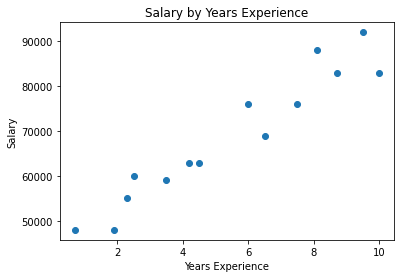

In [ ]:
if is_hw_data_set :
  salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                          (48000, 0.7), (76000, 6),
                          (69000, 6.5), (76000, 7.5),
                          (92000, 9.5), (55000, 2.3),
                          (59000, 3.5), (63000, 4.5),
                          (60000, 2.5), (83000, 10),
                          (48000, 1.9), (63000, 4.2)]
else :
  salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                          (48000, 0.7), (76000, 6),
                          (69000, 6.5), (76000, 7.5),
                          (60000, 2.5), (83000, 10),
                          (48000, 1.9), (63000, 4.2)]

from matplotlib import pyplot as plt

plt.scatter([tenure for salary,tenure in salaries_and_tenures ], [salary for salary,tenure in salaries_and_tenures ])
plt.title('Salary by Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

* The average salary for each tenure

In [ ]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
print(sorted(average_salary_by_tenure.items(), key=lambda x:x[0]))
for t in sorted(average_salary_by_tenure.items(), key=lambda x:x[0]) :
  print(f'{t[0]} : {t[1]}')

[(0.7, 48000.0), (1.9, 48000.0), (2.3, 55000.0), (2.5, 60000.0), (3.5, 59000.0), (4.2, 63000.0), (4.5, 63000.0), (6, 76000.0), (6.5, 69000.0), (7.5, 76000.0), (8.1, 88000.0), (8.7, 83000.0), (9.5, 92000.0), (10, 83000.0)]
0.7 : 48000.0
1.9 : 48000.0
2.3 : 55000.0
2.5 : 60000.0
3.5 : 59000.0
4.2 : 63000.0
4.5 : 63000.0
6 : 76000.0
6.5 : 69000.0
7.5 : 76000.0
8.1 : 88000.0
8.7 : 83000.0
9.5 : 92000.0
10 : 83000.0


* Bucket the tenures

In [ ]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'more than five': 81000.0, 'less than two': 48000.0, 'between two and five': 60000.0}


# T4. Paid Accounts

In [ ]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

# T5. Topics of Interest

In [ ]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
r 3
cassandra 3
python 3
learning 3
hadoop 2
hbase 2
scikit-learn 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
